In this module, we will import data, plot the data, and calculate some basic statistics from them.

We will begin by importing the data, either from Google Drive our our local system.

In [ ]:
# First, import pandas and matplotlib libraries to be used for reading .csv/.xlsx files and plotting the data
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored

# This command requests the user to input the file type to upload. "input()" creates the request for user input,
# while "int()" ensures the user input is read as an integer variable.
typ = int(input("Please enter a number for the file type you would like to upload (1).xlsx (2).csv:\n"))

if typ != 1 and typ != 2:
  print(colored('ERROR: invalid input entered. Please restart this section.', 'red'))

else:
  loc = int(input("Please enter a number for the resource location from which to import data (1)Google Drive (2)Local Drive:\n"))
  
  if loc != 1 and loc != 2:
    print(colored('ERROR: invalid input entered. Please restart this section.', 'red'))

  else:
    if loc == 1: # Google Drive
      
      print("Click on the link to get authentication to allow Google to access your Drive. You should see a screen with\n“Google Cloud SDK wants to access your Google Account” at the top. After you allow permission,\ncopy the given verification code and paste it in the box in Colab.")          
      # This will mount Google Drive to the Colab session
      from google.colab import drive
      drive.mount('/content/drive')
      
      print()
      fileName = input("Please copy the path of your .csv/.xlsx file and paste it here. You can do that by going to the lefthand bar and\nclicking on the folder icon, then going to your mounted drive and your file, then right clicking there and copying the path.\n")
        
      if typ == 1:
        print("\nLoading data...\n")
        dataFrame = pd.ExcelFile(fileName)
        print(dataFrame.sheet_names)
        xl = input("Please type the exact sheet name you would like to use data from:\n")
        dataFrame = dataFrame.parse(xl)
      elif typ == 2:
        dataFrame = pd.read_csv(fileName)

    elif loc == 2: # Local drive
      # This will import the 'files' and 'io' libraries to access files and perform tasks on them
      from google.colab import files
      import io
      uploaded = list(files.upload().values())[0]

      if typ == 2:
        dataFrame = pd.read_csv(io.BytesIO(uploaded))  
      
      elif typ == 1:
        dataFrame = pd.ExcelFile(io.BytesIO(uploaded))
        print(dataFrame.sheet_names)
        xl = input("Please type the exact sheet name you want to use data of:\n")
        dataFrame = dataFrame.parse(xl)

Please enter a number for the file type you would like to upload (1).xlsx (2).csv:
1
Please enter a number for the resource location from which to import data (1)Google Drive (2)Local Drive:
1
Click on the link to get authentication to allow Google to access your Drive. You should see a screen with
“Google Cloud SDK wants to access your Google Account” at the top. After you allow permission,
copy the given verification code and paste it in the box in Colab.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Please copy the path of your .csv/.xlsx file and paste it here. You can do that via going to the left bar and click on the folder icon,
then going to your mounted drive and your file, then right clicking there and copying the path.
/content/drive/My Drive/Colab Notebooks/Copy of data_extractV4_6jun2020.xlsx

Loading data...

['Fitbit_Heart_Rate', 'Fitbit_Body_Fat', 'Fitbit_Body_Weight', 'Fitbit_Calories_I

Now that we have imported our data, we can plot them and calculate some simple statistics from them.

Available sheets:
Index(['Unnamed: 0', 'level', 'mets', 'time', 'value', 'date'], dtype='object')
Please enter the correct option from the above column names you would like to compare against for X-axis:
time
Please enter the correct option from the above column names you would like to compare against for y-axis;
please choose numerical data:
value


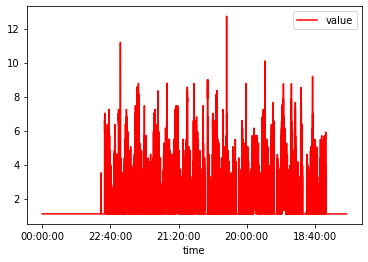

In [ ]:
# This will display the column names
print('Available sheets:')
print(dataFrame.columns)

plot1 = input("Please enter the correct option from the above column names you would like to compare against for X-axis:\n")
plot2 = input("Please enter the correct option from the above column names you would like to compare against for y-axis;\nplease choose numerical data:\n")

# Plot and display the graph
dataFrame.plot(kind='line', x=plot1, y=plot2, color='red')
plt.show()

In [ ]:
print('Available sheets:')
print(dataFrame.columns)

value1 = input("Please enter the option from the  column names you would like to obtain statistics for:\n")

# # Compute the mean
# mean = dataFrame[value1].mean()
# print("Mean: " + str(mean))

# # Compute standard deviation
# std = dataFrame[value1].std()
# print("Standard Deviation: " + str(std))

# Remaining statistics
stats = dataFrame[value1].describe()
print(stats)

Available sheets:
Index(['Unnamed: 0', 'level', 'mets', 'time', 'value', 'date'], dtype='object')
Please enter the option from the  column names you would like to obtain statistics for:
value
Mean: 1.6147254477505402
Standard Deviation: 1.1553153505705105


count    44640.000000
mean         1.614725
std          1.155315
min          1.093700
25%          1.097100
50%          1.097100
75%          1.426230
max         12.726360
Name: value, dtype: float64